# CH2
## 监督学习
### 2.1分类与回归
### 2.2泛化、过拟合与欠拟合
### 2.3监督学习算法
#### 2.3.1一些样本数据集

In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

#### forge

X.shape: (26, 2)


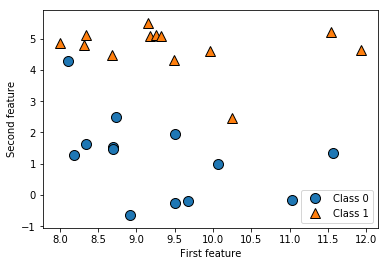

In [3]:
# 生成数据集
X,y=mglearn.datasets.make_forge()
#数据集绘图
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

#### wave

Text(0,0.5,'Target')

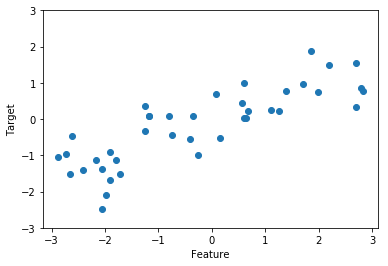

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

#### Cancer

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))


cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [14]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [27]:
print("Sample counts per class: \n{}".format(v for n,v in zip(cancer.target_names, np.bincount(cancer.target))))

Sample counts per class: 
<generator object <genexpr> at 0x0000022B92A66F48>


In [59]:
print("Sample counts per class: \n{}".format({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))


Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [66]:
print("Feature names;\n",cancer.feature_names)

Feature names;
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### bosten

In [67]:
from sklearn.datasets import load_boston
bosten = load_boston()
print("Data shape: ",bosten.data.shape)

Data shape:  (506, 13)


In [68]:
X, y=mglearn.datasets.load_extended_boston()
print("X.shape: ", X.shape)

X.shape:  (506, 104)


#### 2.3.2 k近邻

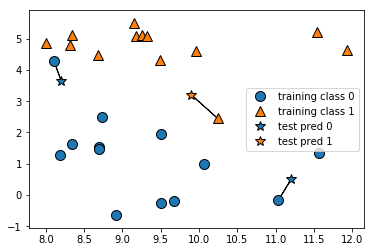

In [72]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

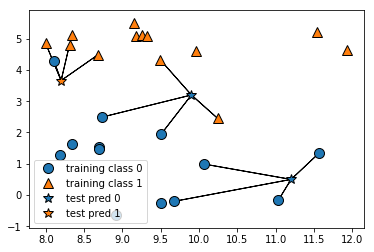

In [73]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [2]:
from sklearn.model_selection import train_test_split
X, y= mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
print("Test set accuracy: %.2f" % (clf.score(X_test, y_test)))

Test set accuracy: 0.86


## 决策边界(decision boundary)

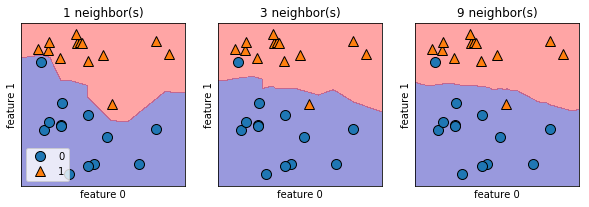

In [11]:
flg, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    #fit 方法返回对象本身，所以我们可以将实例化和拟合放在一行代码里
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
    

## 泛化性能

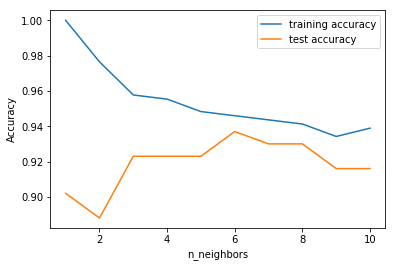

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]
# n_neighbors默认取值1-10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #记录训练集精度
    training_accuracy.append(clf.score(X_train, y_train))
    #记录泛化精度
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


#### K近邻回归

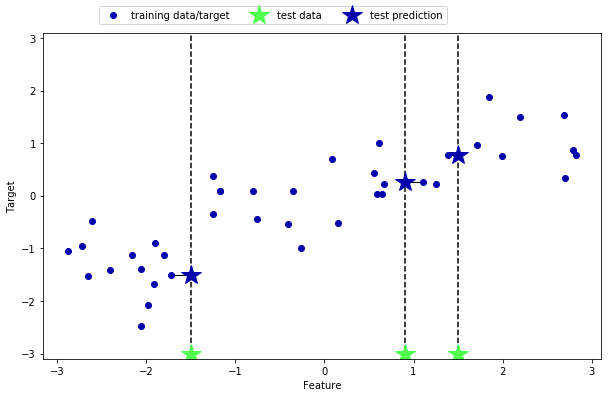

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

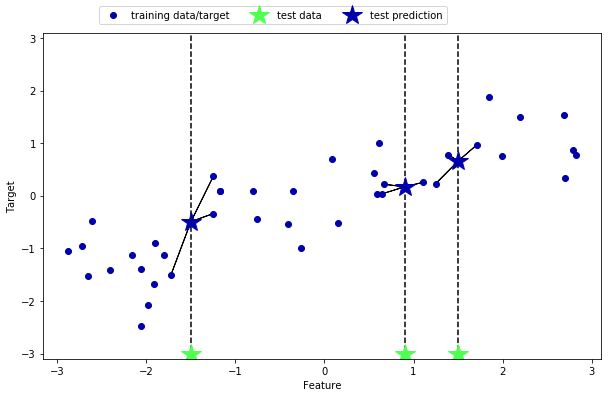

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

#将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#模型实例化
reg = KNeighborsRegressor(n_neighbors=3)
#利用训练数据和训练目标值来拟合模型
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [18]:
print("Test set prediction: \n {}".format(reg.predict(X_test)))

Test set prediction: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


#### 用R^2来评估回归模型

In [22]:
print("Test set R^2: %.2f" % (reg.score(X_test,y_test)))

Test set R^2: 0.83


#### 绘制所有特征取值的预测结果

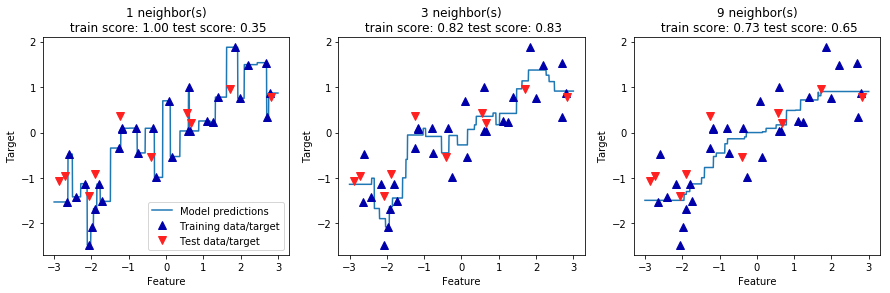

In [38]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
#创建1000个数据点在-3，3之间分布
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors , ax in zip([1,3,9],axes):
    #利用1，3，9个邻居分别进行预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"],loc="best")

In [27]:
help(np.reshape)

Help on function reshape in module numpy.core.fromnumeric:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the firs

#### 2.3.3 线性模型
##### 1.用于回归的线性模型

w[0]: 0.393906  b: -0.031804


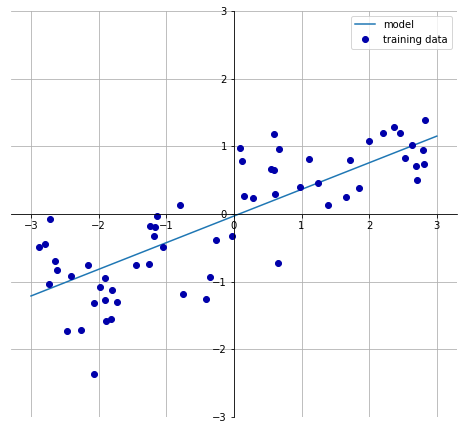

In [3]:
mglearn.plots.plot_linear_regression_wave()

##### 2.线性回归

In [5]:
from sklearn.linear_model import LinearRegression
X, y= mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [7]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


#### 线性模型欠拟合

In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.67
Test set score: 0.66


In [6]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

#### 对bosten房价数据集，线性模型过拟合，训练集得分高然而测试集得分低

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


##### 3.岭回归 (增加 L2正则项，更不容易过拟合)

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


##### 设置alpha=10，增加惩罚

In [16]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


##### 减小alpha后，模型和 MLS 模型近似，仍会过拟合

In [17]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


#### 不同alpha值的Ridge模型与线性回归的系数比较

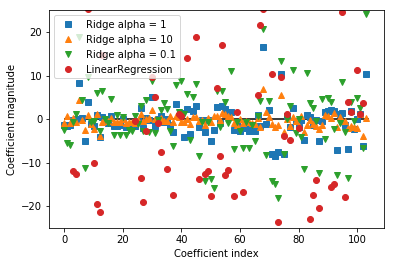

In [18]:
plt.plot(ridge.coef_, 's',label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^',label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v',label = "Ridge alpha = 0.1")

plt.plot(lr.coef_,'o',label = "LinearRegression")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

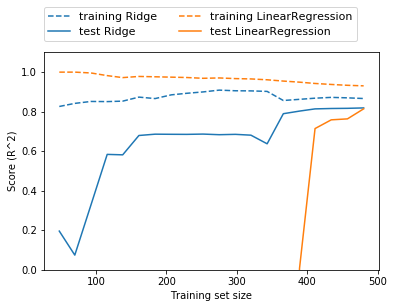

In [2]:
mglearn.plots.plot_ridge_n_samples()

#### 4.lasso

In [9]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Rest set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of feature used: {}".format(np.sum(lasso.coef_ !=0)))


Training set score: 0.29
Rest set score: 0.21
Number of feature used: 4


In [10]:
# 减少alpha的同时需要增大max_iter的数值
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Rest set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of feature used: {}".format(np.sum(lasso001.coef_ !=0)))

Training set score: 0.90
Rest set score: 0.77
Number of feature used: 33


In [11]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Rest set score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of feature used: {}".format(np.sum(lasso00001.coef_ !=0)))

Training set score: 0.95
Rest set score: 0.64
Number of feature used: 94


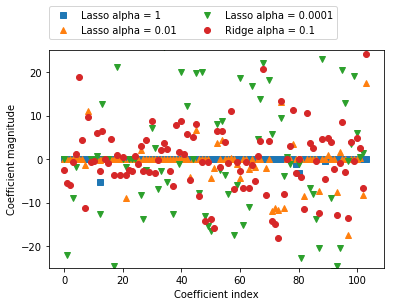

In [19]:
plt.plot(lasso.coef_, 's',label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^',label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v',label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_,'o',label = "Ridge alpha = 0.1")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05))

#### 5.用于分类的线性模型

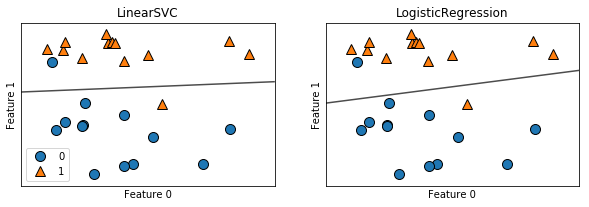

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

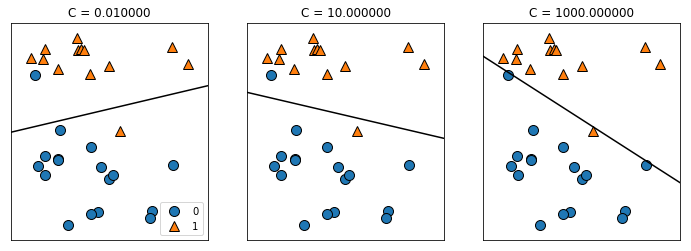

In [28]:
mglearn.plots.plot_linear_svc_regularization()

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.955
Test set score: 0.958


In [34]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.972
Test set score: 0.965


In [35]:
logreg10000 = LogisticRegression(C=10000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg10000.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10000.score(X_test,y_test)))

Training set score: 0.988
Test set score: 0.986


In [36]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score: 0.934
Test set score: 0.930


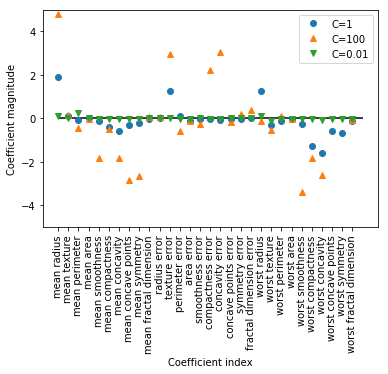

In [46]:
plt.plot(logreg.coef_.T, 'o',label="C=1")
plt.plot(logreg100.coef_.T, '^',label="C=100")
plt.plot(logreg001.coef_.T, 'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001 0.91
Test accuracy if l1 logreg with C=0.001 0.92
Training accuracy of l1 logreg with C=1.000 0.96
Test accuracy if l1 logreg with C=1.000 0.96
Training accuracy of l1 logreg with C=100.000 0.99
Test accuracy if l1 logreg with C=100.000 0.98


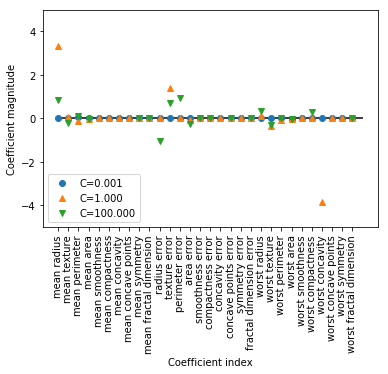

In [54]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f} {:.2f}".format(
    C, lr_l1.score(X_train,y_train)))
    print("Test accuracy if l1 logreg with C={:.3f} {:.2f}".format(
    C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)